<img src="https://github.com/DennisFelixuff/Financas/blob/main/logo_dennis.jpg?raw=True" width="300" align="left"/>

#ARCH Models

- Auto Regressive
- Conditional
- Heteroskedacity

<img src="https://latex.codecogs.com/svg.image?\LARGE&space;&space;\sigma&space;_{t&plus;1}&space;&space;=&space;\alpha&space;_{0}&space;&plus;&space;\alpha&space;_{1}&space;*&space;r_{t}^{2}" title=" \sigma _{t+1} = \alpha _{0} + \alpha _{1} * r_{t}^{2}" />

##GARCH - Generalized Auto Regressive Conditional Heteroskedascity


Heterocedasticidade - variância não constante

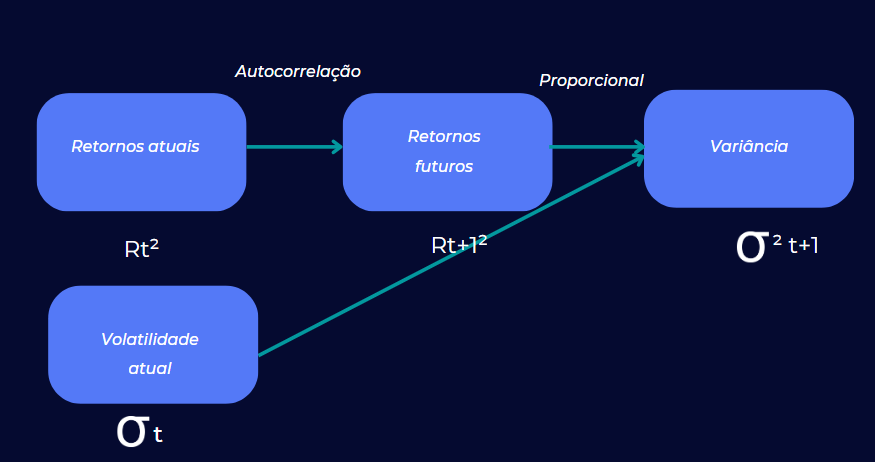

<img src="https://latex.codecogs.com/svg.image?\LARGE&space;&space;\sigma&space;_{t&plus;1}&space;&space;=&space;\alpha&space;_{0}&space;&plus;&space;\alpha&space;_{1}&space;*&space;r_{t}^{2}&plus;\beta&space;_{1}*\sigma&space;_{t}^{2}" title=" \sigma _{t+1} = \alpha _{0} + \alpha _{1} * r_{t}^{2}+\beta _{1}*\sigma _{t}^{2}" />)

In [1]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 19.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
ibov = yf.download('^BVSP', start='2018-01-01', end='2022-12-31')
ibov

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,76403.0,77909.0,76403.0,77891.0,77891.0,2880300
2018-01-03,77889.0,78414.0,77602.0,77995.0,77995.0,3142200
2018-01-04,77998.0,79135.0,77998.0,78647.0,78647.0,3486100
2018-01-05,78644.0,79071.0,78218.0,79071.0,79071.0,2747100
2018-01-08,79070.0,79395.0,78631.0,79379.0,79379.0,2550800
...,...,...,...,...,...,...
2022-12-23,107552.0,109994.0,107552.0,109698.0,109698.0,12847100
2022-12-26,109699.0,109755.0,108309.0,108738.0,108738.0,5219500
2022-12-27,108739.0,109353.0,107418.0,108347.0,108347.0,11158100


##Relação entre Retorno e Volatilidade

Retorno no tempo t -> Volatilidade no tempo t

In [4]:
#Calculando retornos

ibov['log_retornos'] = np.log(ibov['Adj Close'].pct_change()+1)*100

<Axes: xlabel='Date'>

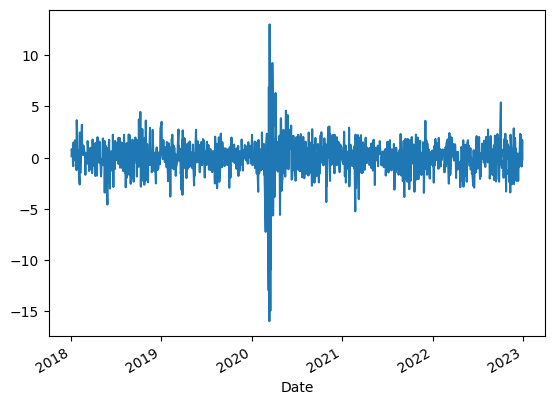

In [5]:
ibov['log_retornos'].plot()

In [6]:
ibov['vol_realizada'] = ibov['log_retornos'].rolling(14).std()*((252)**0.5)
ibov['vol_realizada']

,vol_realizada
Date,
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN
2018-01-08,NaN
...,...
2022-12-23,21.883221
2022-12-26,22.202190
2022-12-27,22.237517


<Axes: xlabel='Date'>

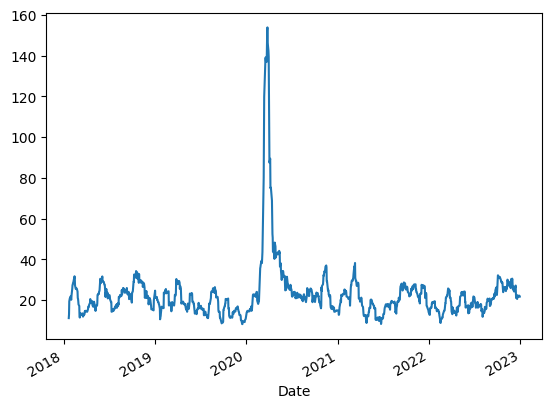

In [7]:
ibov['vol_realizada'].plot()

In [8]:
# Function to predict the volatility of 1 day
def garch_vol(log_retornos):
    # Define model
    garch = arch_model(log_retornos, vol='GARCH', p=1, q=1, dist='skewt')

    # Fit the model
    garch_fit = garch.fit(disp='off')

    # Make forecast
    prev_var = garch_fit.forecast(horizon=1).variance.values[-1]

    # Forecasted volatility
    prev_vol = prev_var**0.5

    # Calculate and return the annualised forecasted variance
    vol_anualizada = prev_vol * (252**0.5)
    return vol_anualizada

In [9]:
# Calculate the GARCH predicted volatility for the each day
ibov['GARCH_vol_pred'] = ibov['log_retornos'].rolling(252).apply(garch_vol, raw=True)

# Shift the GARCH predicted volatility to match with the actual historical volatility on each day
ibov['GARCH_vol_pred'] = ibov['GARCH_vol_pred'].shift(1)

In [10]:
ibov

,Open,High,Low,Close,Adj Close,Volume,log_retornos,vol_realizada,GARCH_vol_pred
Date,,,,,,,,,
2018-01-02,76403.0,77909.0,76403.0,77891.0,77891.0,2880300,NaN,NaN,NaN
2018-01-03,77889.0,78414.0,77602.0,77995.0,77995.0,3142200,0.133431,NaN,NaN
2018-01-04,77998.0,79135.0,77998.0,78647.0,78647.0,3486100,0.832476,NaN,NaN
2018-01-05,78644.0,79071.0,78218.0,79071.0,79071.0,2747100,0.537670,NaN,NaN
2018-01-08,79070.0,79395.0,78631.0,79379.0,79379.0,2550800,0.388767,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-23,107552.0,109994.0,107552.0,109698.0,109698.0,12847100,2.194406,21.883221,25.021467
2022-12-26,109699.0,109755.0,108309.0,108738.0,108738.0,5219500,-0.878982,22.202190,25.010810
2022-12-27,108739.0,109353.0,107418.0,108347.0,108347.0,11158100,-0.360228,22.237517,24.789135


In [11]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume,log_retornos,vol_realizada,GARCH_vol_pred
Date,,,,,,,,,
2022-12-23,107552.0,109994.0,107552.0,109698.0,109698.0,12847100,2.194406,21.883221,25.021467
2022-12-26,109699.0,109755.0,108309.0,108738.0,108738.0,5219500,-0.878982,22.202190,25.010810
2022-12-27,108739.0,109353.0,107418.0,108347.0,108347.0,11158100,-0.360228,22.237517,24.789135
2022-12-28,108578.0,110536.0,108578.0,110237.0,110237.0,11193900,1.729355,21.660961,24.547583
2022-12-29,110237.0,111178.0,109560.0,110031.0,110031.0,13389100,-0.187045,21.694269,24.476719


In [12]:
import plotly.graph_objects as go

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='Vol Realizada', x=ibov.index, y=ibov['vol_realizada']))
fig.add_trace(go.Scatter(name='GARCH Model', x=ibov.index, y=ibov['GARCH_vol_pred']))
fig.update_layout(title_text='Prevendo Volatilidade IBOV Modelo GARCH', template='plotly_dark')